In [1]:
%load_ext lab_black

# Cartopy and Gridding in python

This notebook contains an example code on how to make maps with cartopy and how to grid data, which is displayed on a map.

Notebook written by Maximilian Lowe (maxwe32@bas.ac.uk), last updated 05/04/2024

# Work in progress (no clean version jet / only brain dump)

**Cartopy** is a python package, which is dedicated to draw maps and visualzing spatial data on maps. Drawing a basic map in cartopy is relative straight forwrad and doesnt require a lot of code. Advance maps might require more code. We will with simple maps and gradually increase our code with the aim of producing a nice overview map, which could be used in your published.

We start by importing the necessary libraries to create simple maps with **cartopy** and **matplotlib**:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy
import cartopy.crs as ccrs

# **Simple global map**

First, we need to create a new and empty matplotlib figure by using the command: `figure1 = plt.figure(figsize=(8, 8))`.

Next we draw a subplot, which allows of plotting mutlple panels in one figure with the subsequent command: `ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())`

Here we plot only one figure, therefore we only define one panel as `ax1`. The subfigure parameters are set to `1, 1, 1,`, which gives the position of the subfigure in a row and column system. The first number stands for the numbers of rows and the scond number stands for the number of columns, while the third number stands for the postions of the subfigure in row and colums, which is counted from left to right and up to down.

More important, perhaps, is the following projection statement `projection=ccrs.Robinson())` at the end of this command. The projection statement defines the subfigure axis in the a given projection. Here we use the Robinson projection. The most common map projections are supported by **cartopy** including **UTM zones, SouthPolarStereo** and, **cylindrical projections**. A list of projection can be found here: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html.


Next use **cartopy** to draw costlines into our subfigure by using the command `ax1.coastlines()`.


Last, we draw gridlines of our map and give latitude and longitude lables by applying the following command `ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")`. `linewidth=0.5` defines the thickness of the displayed gridlines. `draw_labels=True` draws the the latitude and longitude labels. Setting the argument to `None` instead of `True` will supress the labels. `color="k"` is setting the color of the grid lines. Here we use "k" which draws the lines in blac**k**. The `alpha=0.5` command set the grid lines to a transprancy level of 50% and `linestyle="-"` draws the gridlines as a continous line. 

We have now create a simple global map with only four lines of python code

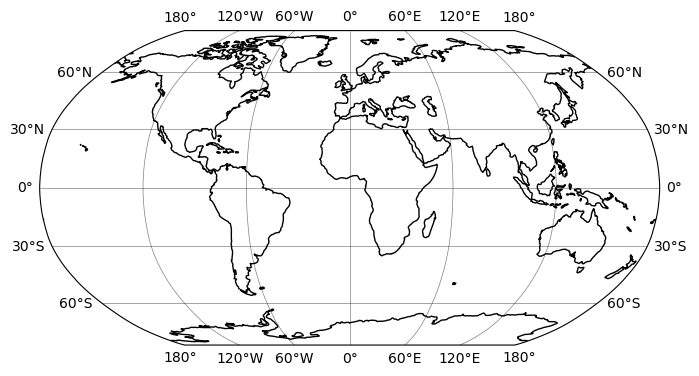

In [3]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

Next we want to fill the contients and oceans with a color to create a more appealing map. 


# Hier weiter


cartophy `cfeature` allows an easy way to plot geographically feature like land ocean lakes or political features such as borders

In [3]:
from cartopy import feature as cfeature

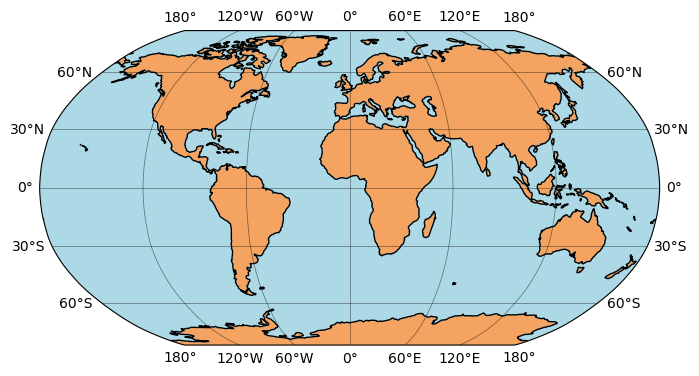

In [5]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())

ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.add_feature(cfeature.LAND, color="sandybrown")
ax1.add_feature(cfeature.OCEAN, color="lightblue")
ax1.coastlines()

**sattelite images**

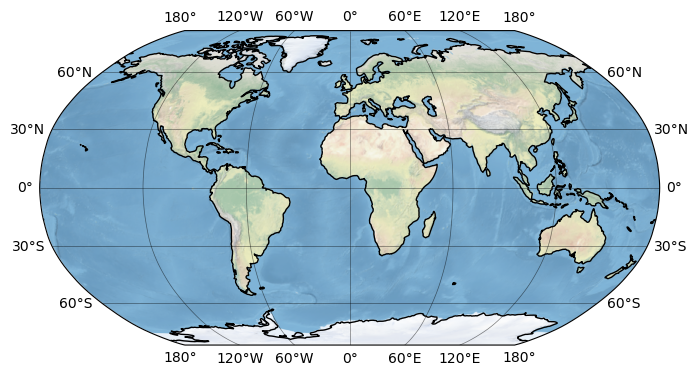

In [6]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

# feature scale 

C:\Users\maxim\.conda\envs\JIF3D\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


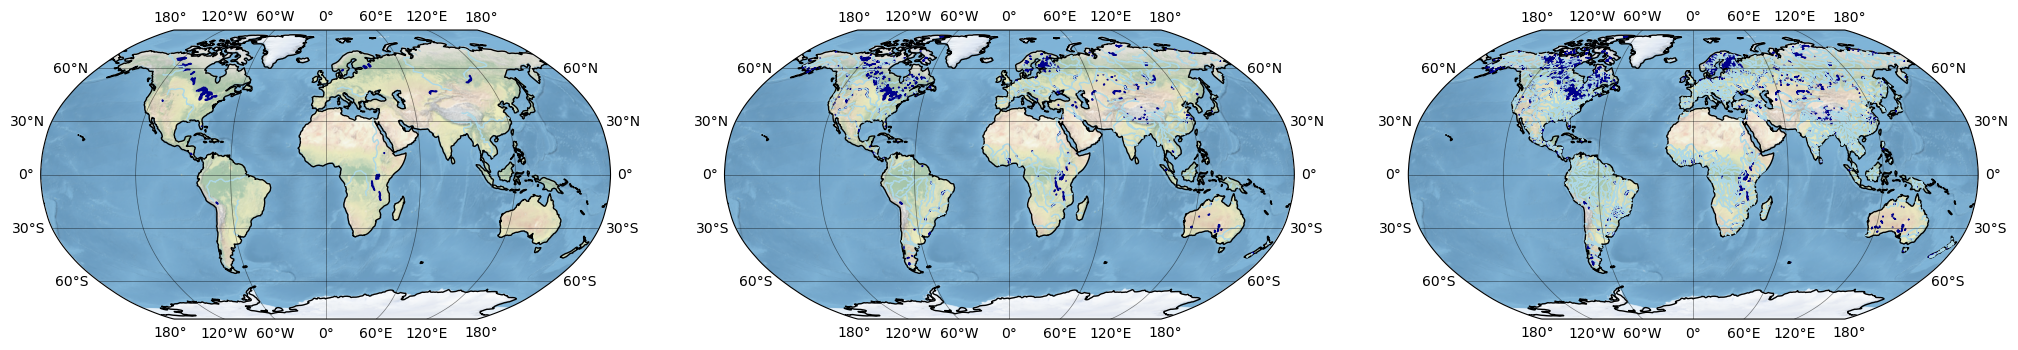

In [7]:
figure1 = plt.figure(figsize=(25, 25))

ax1 = plt.subplot(1, 3, 1, projection=ccrs.Robinson())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.add_feature(cfeature.LAKES.with_scale("110m"), color="darkblue")
ax1.add_feature(cfeature.RIVERS.with_scale("110m"), color="lightblue")

ax2 = plt.subplot(1, 3, 2, projection=ccrs.Robinson())
ax2.stock_img()
ax2.coastlines()
ax2.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax2.add_feature(cfeature.LAKES.with_scale("50m"), color="darkblue")
ax2.add_feature(cfeature.RIVERS.with_scale("50m"), color="lightblue")

ax3 = plt.subplot(1, 3, 3, projection=ccrs.Robinson())
ax3.stock_img()
ax3.coastlines()
ax3.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax3.add_feature(cfeature.LAKES.with_scale("10m"), color="darkblue")
ax3.add_feature(cfeature.RIVERS.with_scale("10m"), color="lightblue")

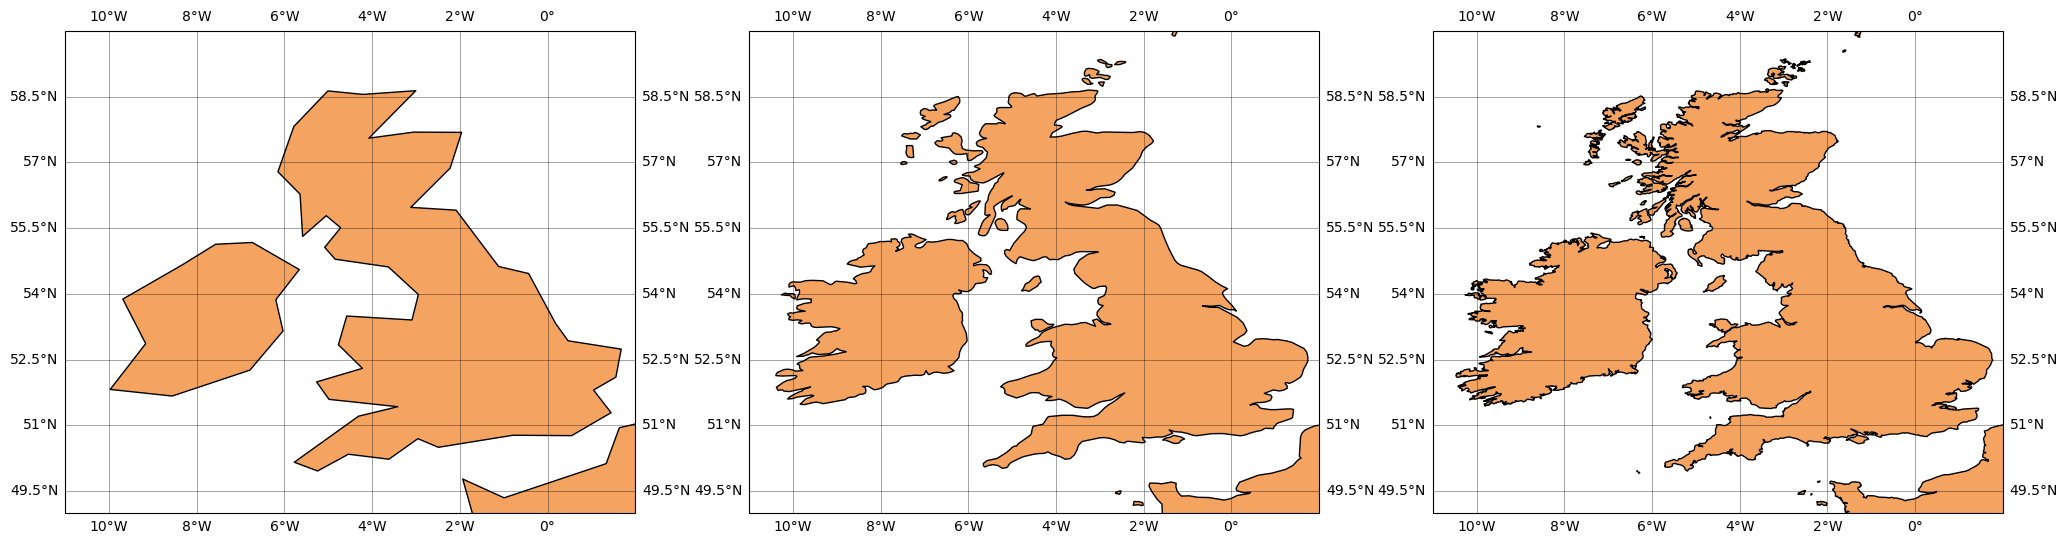

In [8]:
# Generate the coastline feature at three different scales
land_110m = cartopy.feature.NaturalEarthFeature(
    "physical", "coastline", "110m", edgecolor="k", facecolor="sandybrown"
)
land_50m = cartopy.feature.NaturalEarthFeature(
    "physical", "coastline", "50m", edgecolor="k", facecolor="sandybrown"
)
land_10m = cartopy.feature.NaturalEarthFeature(
    "physical", "coastline", "10m", edgecolor="k", facecolor="sandybrown"
)


figure1 = plt.figure(figsize=(25, 25))

ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
ax1.add_feature(land_110m)
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.set_extent([-11, 2, 49, 60], crs=ccrs.PlateCarree())

ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1, projection=ccrs.PlateCarree())
ax2.add_feature(land_50m)
ax2.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, projection=ccrs.PlateCarree())
ax3.add_feature(land_10m)
ax3.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

# global map rotate

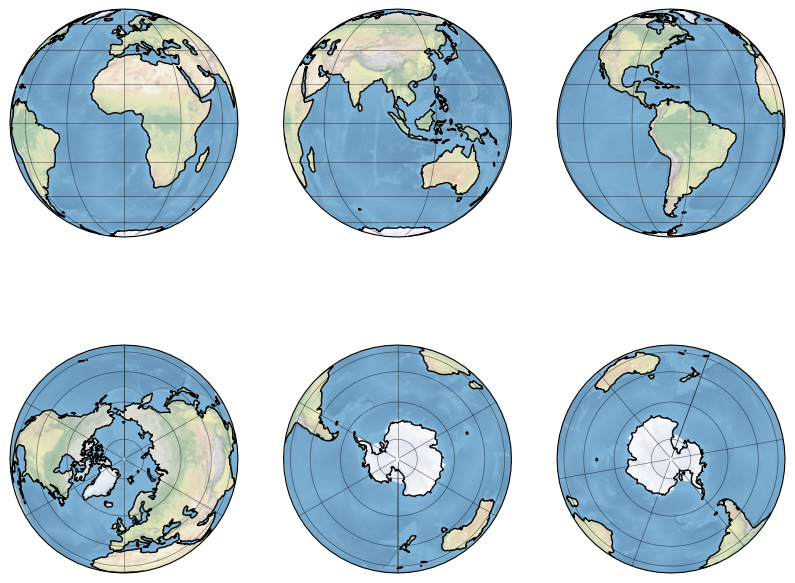

In [9]:
figure1 = plt.figure(figsize=(10, 8))

ax1 = plt.subplot(
    2, 3, 1, projection=ccrs.Orthographic(central_latitude=0, central_longitude=0)
)
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax2 = plt.subplot(
    2, 3, 2, projection=ccrs.Orthographic(central_latitude=0, central_longitude=100)
)
ax2.stock_img()
ax2.coastlines()
ax2.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax3 = plt.subplot(
    2, 3, 3, projection=ccrs.Orthographic(central_latitude=0, central_longitude=290)
)
ax3.stock_img()
ax3.coastlines()
ax3.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax4 = plt.subplot(
    2, 3, 4, projection=ccrs.Orthographic(central_latitude=90, central_longitude=0)
)
ax4.stock_img()
ax4.coastlines()
ax4.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax5 = plt.subplot(
    2, 3, 5, projection=ccrs.Orthographic(central_latitude=-90, central_longitude=0)
)
ax5.stock_img()
ax5.coastlines()
ax5.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax6 = plt.subplot(
    2, 3, 6, projection=ccrs.Orthographic(central_latitude=-90, central_longitude=160)
)
ax6.stock_img()
ax6.coastlines()
ax6.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

 Plate Carrée (also known as Equirectangular or Equidistant Cylindrical.) 

## Projection and Transform arguments

The projected axes of cartopy maps are independent from the coordinate system of the used dataset. The `projection` arguments defines the map outlay. The `transform` argument tells Cartopy in which coordinate system the data is presented.

Lets have a look at an example using Lat Lon and polar steographix coordinates systems for Antarctica research stations operated by the British Antarctic Survey


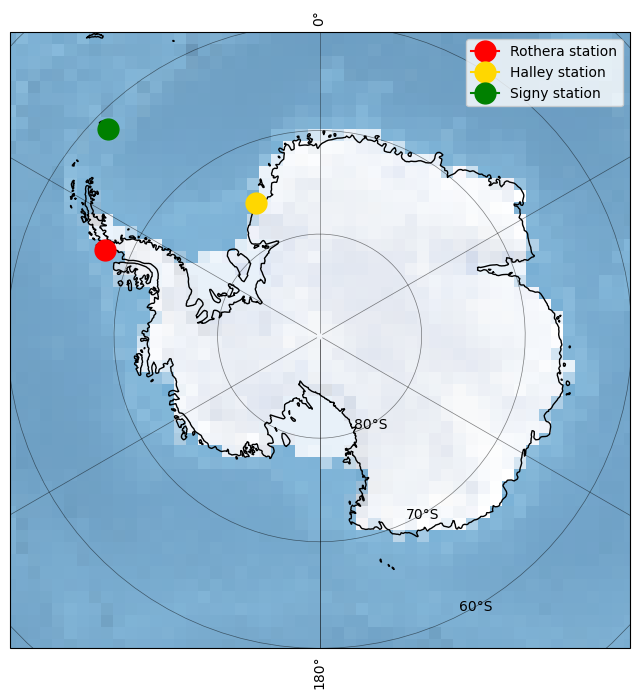

In [10]:
Rothera_lat = -67.56778
Rothera_lon = -68.12778
Halley_lat = -75.56805
Halley_lon = -25.50833
Signy_x_ps = -2322053.890662
Signy_y_ps = 2273923.172021

figure1 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
ax1.plot(
    Rothera_lon,
    Rothera_lat,
    color="red",
    marker="o",
    markersize=15,
    transform=ccrs.PlateCarree(),
    label="Rothera station",
)

ax1.plot(
    Halley_lon,
    Halley_lat,
    color="gold",
    marker="o",
    markersize=15,
    transform=ccrs.PlateCarree(),
    label="Halley station",
)

ax1.plot(
    Signy_x_ps,
    Signy_y_ps,
    color="green",
    marker="o",
    markersize=15,
    transform=ccrs.SouthPolarStereo(),
    label="Signy station",
)

ax1.legend(loc="upper right")

In [11]:
import numpy as np

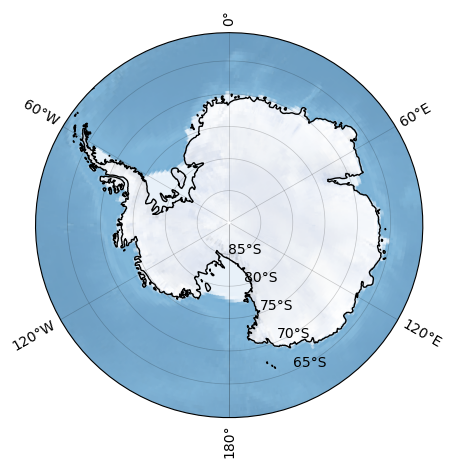

In [12]:
figure1 = plt.figure(figsize=(5, 5), facecolor="white")
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax1.set_boundary(circle, transform=ax1.transAxes)

ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.2, linestyle="-")
ax1.stock_img()
ax1.coastlines()

C:\Users\maxim\.conda\envs\JIF3D\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


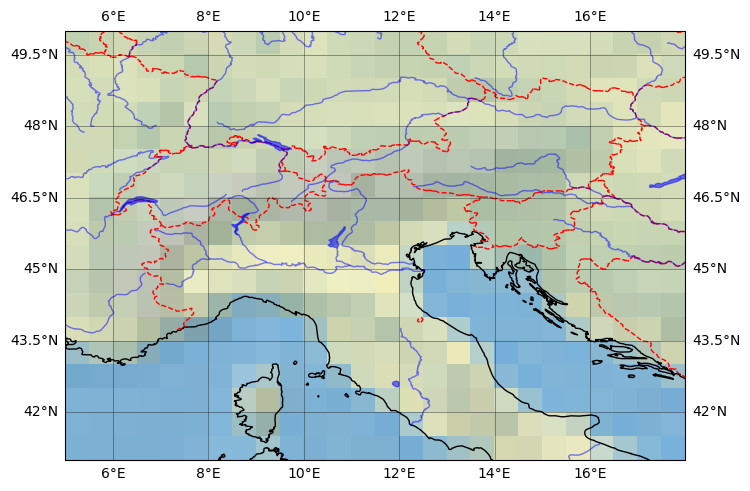

In [13]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = figure1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([5, 18, 41, 50])
ax1.stock_img()
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle="--", color="red")
ax1.add_feature(cfeature.LAKES, color="blue", alpha=0.5)
ax1.add_feature(cfeature.RIVERS, color="blue", alpha=0.5)
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

# Gridding

Download Topographic data from ETOPO called: **ETOPO_2022_v1_30s_N90W180_bed.nc** at https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/30s/30s_bed_elev_netcdf/catalog.html?dataset=globalDatasetScan/ETOPO2022/30s/30s_bed_elev_netcdf/ETOPO_2022_v1_30s_N90W180_bed.nc and place the netCDF file in the same directory as this jupyter notebook

In [14]:
import netCDF4 as nc4

In [15]:
nc1 = nc4.Dataset("ETOPO_2022_v1_30s_N90W180_bed.nc")

In [16]:
nc1

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    GDAL_AREA_OR_POINT: Area
    node_offset: 1
    GDAL_TIFFTAG_COPYRIGHT: DOC/NOAA/NESDIS/NCEI > National Centers for Environmental Information, NESDIS, NOAA, U.S. Department of Commerce
    GDAL_TIFFTAG_DATETIME: 20220929123913.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION: Topography-Bathymetry; EGM2008 height
    Conventions: CF-1.5
    GDAL: GDAL 3.3.2, released 2021/09/01
    NCO: netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): lon(43200), lat(21600)
    variables(dimensions): |S1 crs(), float64 lat(lat), float64 lon(lon), float32 z(lat, lon)
    groups: 

because the topo data is provided in 2D array we quickly need to grid the coordinates to obtain x and y grid coordinates matching the provide topo data

In [17]:
xq, yq = np.meshgrid(nc1.variables["lon"][:], nc1.variables["lat"][:], indexing="xy")

now we can flatten the x and y coordiantes and the topographyic data to obtain a signle data file in a xyz format

In [18]:
xflat = xq.flatten()
yflat = yq.flatten()
zflat = nc1.variables["z"][:].flatten()
ETOPO_xyz = np.vstack((xflat, yflat, zflat)).T

The dataset is rather large and takes a long time to plot. We therefore want to cut out the relevent data for the Alps and Italy. We creating and index variable called `alp_lon_lat_index`, which test the coordinates against a minium and maximium in the x and y coordinate. Subsequently, we create a new `ETOPO_alps` which only includes the Alpine subset of the data within the defined x and y boundary

In [19]:
alp_lon_lat_index = (
    (ETOPO_xyz[:, 0] > 5)
    & (ETOPO_xyz[:, 0] < 18)
    & (ETOPO_xyz[:, 1] > 41)
    & (ETOPO_xyz[:, 1] < 50)
)

Etopo_alps = ETOPO_xyz[alp_lon_lat_index, :]

Gridding the subset dataset (a bit reducenten but it illustrate how you would grid any other dataset such as potential fields, Sea surface temperature or CO2 concentration )

We start by griding the the unique x and y coordinates with `np.meshgrid` (as before)

In [20]:
xgrid, ygrid = np.meshgrid(
    np.unique(Etopo_alps[:, 0]), np.unique(Etopo_alps[:, 1]), indexing="xy"
)

The data gridding is performed using `griddata` from the scipy.interpolate module. The syntax is x y points (coordinates) followed by the data value. So far it this is just the input point from the xyz datafile. The next argument gives the x and y grids followed by the interpolation methode. The idalised syntax therefore is `griddata((x,y datapoints) , data value , (grid_x , grid_y) , method='linear')`. You can choose for the interpolation method from `nearest` (nearest neighbour), `linear`, and `cubic`.

Disclaimer, we have gridded here an already regular distributed data set. However, the workflow shown here can be applied to interpolate and grid irregular spaced data points. You might want your gridded product to have a fine or coarse resolution then your input data has. To do so you can varry the created meshgrid. A way to understand what happend during the gridding is to view the frist 3 agruments as your observed data point and to view the last 2 arguemtns (grid_x , grid_y) as the coordinates upon you interpolate your observed values   

In [21]:
from scipy.interpolate import griddata

In [22]:
Alp_topo_grid = griddata(
    (Etopo_alps[:, 0], Etopo_alps[:, 1]),
    Etopo_alps[:, 2],
    (xgrid, ygrid),
    method="linear",
)

creating colormap. We want to use scentific colormaps

In [23]:
from cmcrameri import cm

In [24]:
s_colormap = cm.bukavu

plotting the new topo data

Text(0.5, 1.0, 'meter')

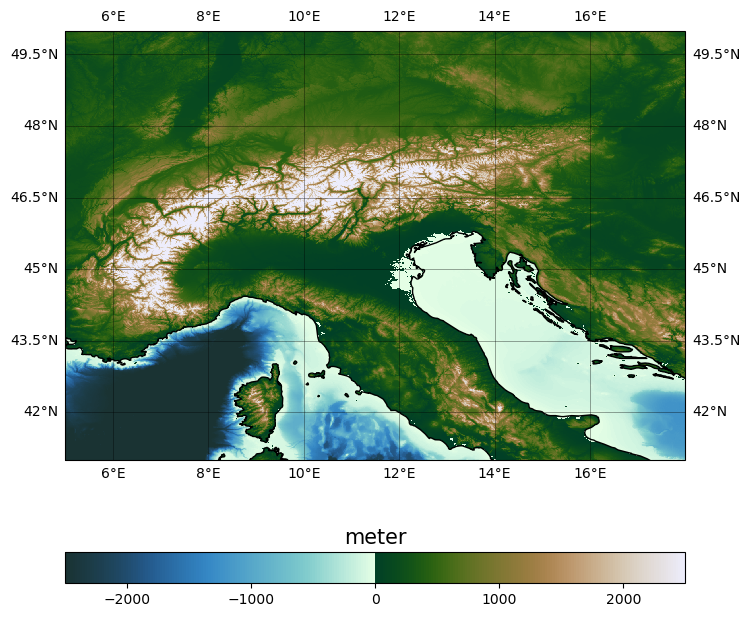

In [25]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = figure1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
im1 = plt.pcolormesh(
    xgrid, ygrid, Alp_topo_grid, cmap=s_colormap, vmin=-2500, vmax=2500
)
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
cb = plt.colorbar(im1, orientation="horizontal", shrink=1)
cb.ax.set_title("meter", fontsize=15)

Looks much better compared to the satallite data 

# adding overview map and data locations

explain multi panel figures!

In [26]:
from shapely.geometry.polygon import Polygon
import geopandas as gpd

In [27]:
# define polygon extend (repeat first point to close the polygon)
x_ps_point_list = [5, 5, 18, 18, 5]
y_ps_point_list = [41, 50, 50, 41, 41]

# create the polygon and also create a GeoSeries, which holds the polygon for plotting with geopandas
polygon_geom = Polygon(zip(x_ps_point_list, y_ps_point_list))
polygon_alps = gpd.GeoSeries(polygon_geom)

bring everthing we learned together

C:\Users\maxim\.conda\envs\JIF3D\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


<GeoAxes: >

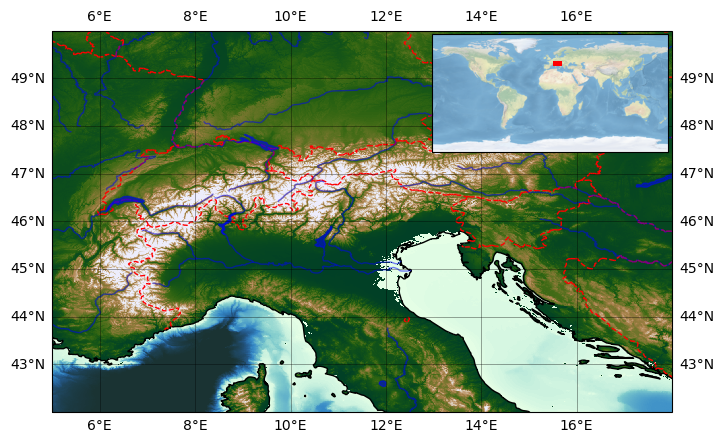

In [28]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = figure1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([5, 18, 42, 50])
im1 = plt.pcolormesh(
    xgrid, ygrid, Alp_topo_grid, cmap=s_colormap, vmin=-2500, vmax=2500
)
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle="--", color="red")
ax1.add_feature(cfeature.LAKES, color="blue", alpha=0.5)
ax1.add_feature(cfeature.RIVERS, color="blue", alpha=0.5)
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")


# insert an additional axes for the overview map
ax2 = plt.axes([0.6, 0.53, 0.295, 0.25], projection=ccrs.PlateCarree())

ax2.stock_img()
polygon_alps.plot(ax=ax2, color="red", transform=ccrs.PlateCarree())